In [ ]:
#@title Python import block

%matplotlib inline

import numpy as np
import os
import scipy
from scipy import interpolate
import math
import json
from pprint import pprint as pp
import time
import copy
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import lines
from matplotlib import patches
import multiprocessing
from cycler import cycler
import itertools
import pandas as pd
import cProfile
import csv
import inspect
import IPython
import six

In [ ]:
def norm_idx(idx, num_id):
  return float(idx)/(num_id - 1.)
def trim_norm(v, clip_l, clip_r):
  return np.interp(v, [0., 1.], [clip_l, clip_r])

def nested_to_csv(d, num_levels=3, row='', level=1):
  o = ''
  if type(d) == list:
    d = {ii:v for ii, v in enumerate(d)}
  if hasattr(d, 'items'):
    for key, value in d.items():
      new_row = row + str(key)
      if hasattr(value, 'items') or type(value) == list:
        if level >= num_levels:
          o += new_row + ',' + str(nested_dict_sum(value)) + '\n'
          print(new_row + ',' + str(nested_dict_sum(value)))
        else:
          o += nested_to_csv(
              value, num_levels, new_row + ',', level=level+1)
      else:
        o += new_row + ','*(num_levels-level+1) + str(value) + '\n'
        print(new_row + ','*(num_levels-level+1) + str(value))
    return o
def nested_dict_sum(vals, x = 0.0):
  """recursively sums all values in nested dictionaries \n
     use x to give initial value"""
  if isinstance(vals, dict):
    try:
      x += sum(vals.values())
    except:
      for dct in vals.values():
        x += nested_dict_sum(dct)

  elif isinstance(vals, float) or isinstance(vals, int):
    x += vals
  elif hasattr(vals, '__iter__'):
    for i in vals:
      x += nested_dict_sum(i)
  else:
    print("issue with nested_dict_sum dict is not as expect ")

  return x

In [ ]:
#@markdown Input your nested data from a JSON here<br>
#@markdown (double click to enter code, double click text to hide)
data = {
    'cost_maint': {
      'equipment': {
        'ForkLift': 30000.0, 
        'Shelving': 30000.0, 
        'PPE': 203354.93750000006, 
        'Equip_cons': 60000.0, 
        'Truck_flat_bed': 2976000.0, 
        'BOP': 4712000.0, 
        'Trailer_wing': 160000.0, 
        'Trailer_tail': 64000.0, 
        'Cell_Phones': 3000.0, 
        'Truck_Maint': 321000.0, 
        'Server': 6000.0, 
        'Print_Scan': 12000.0, 
        'Boomlift': 150000.0, 
        'Drone_inspection': 1268000.0, 
        'Calibration': 100000.0, 
        'Truck_tools': 176100.0, 
        'Office_Consu': 840000.0, 
        'Fuel': 1588950.0, 
        'PPE_Consu': 80000.0, 
        'Truck_site': 4429800.0, 
        'Site_Tools': 1232000.0
      }, 
      'training': {
        'First_Aid_CPR': 60900.0, 
        'Lift_training': 21150.0, 
        'OSHA_10': 96000.0, 
        'Tower_rescue': 304500.0, 
        'NFPA_70E': 138000.0
      }, 
      'components': {
        'consumables': {
          'carbon_repair': 12600000.0, 
          'maint_consumables': 3360000.0
        }, 
        'airframe': {
          'tail_servos': 399060.45850541483, 
          'pylons': 823739.6909001402, 
          'hull': 1213966.3080885445, 
          'aileron_servos': 399060.4585054149, 
          'elevator': 91318.2763352712, 
          'rudder': 57272.4533870633, 
          'airframe_non_composites': 5687.070125220706, 
          'fuse': 102796.38237978288, 
          'flaps': 383381.6796952047, 
          'fin': 220944.0285433973, 
          'lightning_strike': 167682.85474497557
        }, 
        'avionics': {
          'bridle_electronics': 970380.723719205, 
          'bridle_junction': 438961.8040658408, 
          'flight_control_units': 1663529.763992437, 
          'FAA_lights': 797058.5478217476, 
          'servo_controllers': 1001571.308489925, 
          'sensors': 2379723.251504251, 
          'kite_ground_comms': 2541453.3721241187, 
          'LV_harness': 375897.59349071526
        }, 
        'tether': {
          'bridle': 586741.8807910013, 
          'tether': 7364417.275339413, 
          'bridle_tether_knot': 3236.257488735838
        }, 
        'ground_power': {
          'grid_side_inverters': 34478168.068392314, 
          'batteries': 7360873.278349322, 
          'DC_DC_converter': 0.0
        }, 
        'powertrain': {
          'MV_LV_converter': 434845.63936605875, 
          'rotor': 1875035.4605634972, 
          'fault_mitigation_module': 0.0, 
          'kite_wiring': 7689.524442705071, 
          'motor': 26849237.039777946, 
          'motor_controllers': 38796236.40511352, 
          'cooling': 6067683.200640297, 
          'rotor_pitch': 0.0, 
          'LV_batt': 776252.3477703334
        }, 
        'ground_station': {
          'perch': 144677.5783719674, 
          'winch_motor': 41808.7551276905, 
          'azimuth_disk': 0.0, 
          'frame': 0.0, 
          'winch_caliper': 1627674.1260299124, 
          'levelwind': 50575.78060706877, 
          'GSG': 54600.86122220998, 
          'pedestal': 7945.640381945779, 
          'azimuth_ring_pinion': 0.0, 
          'winch_bearing': 363.5872337251118, 
          'azimuth_HPU': 0.0, 
          'drum': 0.729401544863945, 
          'winch_gearbox': 29372.879339007923, 
          'restraint_mechanism': 55012.640726348545, 
          'winch_ring_pinion': 390.85627625449507, 
          'slipring': 1429808.1313969416, 
          'azimuth_bearing': 0.0, 
          'winch_HPU': 3764300.403889529, 
          'azimuth_motor': 0.0, 
          'tower': 120697.26506270717, 
          'winch_disk': 1726248.624958915, 
          'azimuth_caliper': 0.0, 
          'azimuth_gearbox': 0.0
        }
      }, 
      'labor': {
        'scheduled': {
          'kite_access': {
            'kite_positioning': 1517082.8253652742, 
            'travel_to_kite': 1517082.8253652742, 
            'general_inspection': 189635.35317065928
          }, 
          'airframe': {
            'tail_servos': 146041.37980209806, 
            'pylons': 1642967.1657407682, 
            'hull': 2190622.8876543585, 
            'aileron_servos': 547655.7218916834, 
            'elevator': 91275.95364861393, 
            'rudder': 54765.572191358966, 
            'airframe_non_composites': 273827.8609567948, 
            'fuse': 547655.7219135896, 
            'flaps': 730207.6291889114, 
            'fin': 91275.91714188347, 
            'lightning_strike': 36510.344950524515
          }, 
          'avionics': {
            'bridle_junction': 91275.95361575457, 
            'flight_control_units': 182551.90723150913, 
            'LV_harness': 91275.95361575457, 
            'servo_controllers': 365103.44950524525, 
            'FAA_lights': 273827.86084726366, 
            'bridle_electronics': 182551.90723150913, 
            'sensors': 547655.7219135896, 
            'kite_ground_comms': 91275.95361575457
          }, 
          'ground_power': {
            'grid_side_inverters': 547655.7219135896, 
            'batteries': 91275.95364861393, 
            'DC_DC_converter': 0.0
          }, 
          'powertrain': {
            'rotor': 3285934.3314815364, 
            'motor_controllers': 438124.1394062942, 
            'rotor_pitch': 0.0, 
            'cooling': 6571868.662963073, 
            'LV_batt': 36510.344950524515, 
            'MV_LV_converter': 273827.8609567948, 
            'fault_mitigation_module': 0.0, 
            'kite_wiring': 36510.344950524515, 
            'motor': 876248.2788125884
          }, 
          'tether': {
            'bridle_tether_knot': 54765.572191358966, 
            'tether': 2190622.8876543585, 
            'bridle': 219062.28876543586
          }, 
          'ground_station': {
            'perch': 36510.344950524515, 
            'azimuth_disk': 0.0, 
            'frame': 0.0, 
            'winch_caliper': 36510.344950524515, 
            'GSG': 109531.14438271793, 
            'pedestal': 328477.34933043196, 
            'azimuth_ring_pinion': 0.0, 
            'winch_ring_pinion': 36510.344950524515, 
            'azimuth_motor': 0.0, 
            'azimuth_caliper': 0.0, 
            'winch_motor': 36510.344950524515, 
            'levelwind': 273827.8609567948, 
            'winch_bearing': 36510.344950524515, 
            'azimuth_HPU': 0.0, 
            'drum': 273827.8609567948, 
            'winch_gearbox': 36510.344950524515, 
            'restraint_mechanism': 36510.344950524515, 
            'slipring': 365103.8146090584, 
            'azimuth_bearing': 0.0, 
            'winch_HPU': 54765.51742578679, 
            'tower': 109531.14438271793, 
            'winch_disk': 36510.344950524515, 
            'azimuth_gearbox': 0.0
          }
        }, 
        'kite_access': {}, 
        'unproductive': 10948561.808952635, 
        'BOP': 781965.4731413203, 
        'fault': {}, 
        'overhead': {
          'Admin': 9383585.677695844, 
          'Supervisor': 3753434.2710783374
        }, 
        'unscheduled': {
          'component_replacement': {
            'kite_access': {
              'kite_positioning': 16132429.35859378, 
              'travel_to_kite': 16132429.35859378, 
              'general_inspection': 2016553.6698242226
            }, 
            'airframe': {
              'tail_servos': 80595.53941718902, 
              'pylons': 41575.33516239886, 
              'hull': 32836.92091430485, 
              'aileron_servos': 120893.30912578358, 
              'elevator': 6607.128454315651, 
              'rudder': 1319.982795596125, 
              'airframe_non_composites': 1006.3913342940432, 
              'fuse': 5948.36877414971, 
              'flaps': 53881.49864504414, 
              'fin': 14692.365176873327, 
              'lightning_strike': 492819.5519869374
            }, 
            'avionics': {
              'bridle_junction': 75968.48360865861, 
              'flight_control_units': 151936.96721731723, 
              'LV_harness': 35680.747343118106, 
              'servo_controllers': 392552.690099008, 
              'FAA_lights': 227905.45082597592, 
              'bridle_electronics': 151936.96721731723, 
              'sensors': 151936.96721731723, 
              'kite_ground_comms': 75968.48360865861
            }, 
            'fault': 10393513.33866292, 
            'ground_power': {
              'grid_side_inverters': 236750.26803253836, 
              'batteries': 108800.4815855419, 
              'DC_DC_converter': 0.0
            }, 
            'powertrain': {
              'rotor': 116357.42917997562, 
              'motor_controllers': 1321192.5182914403, 
              'rotor_pitch': 0.0, 
              'cooling': 3055094.7803822574, 
              'LV_batt': 91184.8420121566, 
              'MV_LV_converter': 51639.71534693955, 
              'fault_mitigation_module': 0.0, 
              'kite_wiring': 2213.327969446207, 
              'motor': 1058317.3244666997
            }, 
            'tether': {
              'bridle_tether_knot': 755.2417826583446, 
              'tether': 85376.33814967253, 
              'bridle': 15375.875602832222
            }, 
            'ground_station': {
              'perch': 14834.542332930798, 
              'azimuth_disk': 0.0, 
              'frame': 0.0, 
              'winch_caliper': 77133.04680479034, 
              'GSG': 5995.151309699814, 
              'pedestal': 41962.62146162903, 
              'azimuth_ring_pinion': 0.0, 
              'winch_ring_pinion': 17.018062322879032, 
              'azimuth_motor': 0.0, 
              'azimuth_caliper': 0.0, 
              'winch_motor': 3614.3444371683036, 
              'levelwind': 9621.361468329933, 
              'winch_bearing': 56.726874409596775, 
              'azimuth_HPU': 0.0, 
              'drum': 0.055399786137512556, 
              'winch_gearbox': 3614.3444371683036, 
              'restraint_mechanism': 5583.74995553426, 
              'slipring': 186814.88294983024, 
              'azimuth_bearing': 0.0, 
              'winch_HPU': 1448223.3364160305, 
              'tower': 55950.16194883872, 
              'winch_disk': 280970.7030780358, 
              'azimuth_gearbox': 0.0
            }
          }, 
          'carbon_repair': {
            'kite_access': {
              'kite_positioning': 2664837.821964406, 
              'travel_to_kite': 2664837.821964406, 
              'general_inspection': 333104.72774555074
            }, 
            'repair_time': 7218142.828996804
          }
        }
      }
    }, 
    'CAPEX': {
      'BoS': {
        'soft costs': {
          'transmission': 0.0, 
          'foundation': 0.0, 
          'development': 25000.0, 
          'installation': 0.0, 
          'mooring': 0.0
        }, 
        'roads & civil': {
          'O&M_building': 2500.0
        }, 
        'installation': {
          'assembly': 55000.0, 
          'offshore_construction': 135000.0
        }, 
        'electrical': {
          'collection_sys': {
            'array_cables': 53125.0, 
            'export_cable': 118750.0
          }, 
          'kite termination': 5000.0, 
          'offshore_substation': 318750.0, 
          'pad mnt transformer install': 5000.0, 
          'interconnection': 6250.0, 
          'pad mount transformers': 38000.0, 
          'pad mount trans vaults': 3000.0
        }, 
        'foundations': {
          'mooring_lines': 190000.0, 
          'engineering': 20402.14368181672, 
          'transportation': 17361.11111111111, 
          'anchors': 84166.66666666666, 
          'cathodic_protection': 1970.3957452577395, 
          'secondary_structure': 100000.0, 
          'primary_structure': 178693.68911043584, 
          'ballast': 10017.677669529663, 
          'electrical_equipment': 100000.0
        }, 
        'contingency': 90495.39845175183
      }, 
      'system_price': {
        'gross_profit': {
          'warranty': 41085.0323202923, 
          'general_admin': 8803.935497205492, 
          'r_and_d': 8116.475012056635, 
          'operating_profit': 73048.2751085097, 
          'direct_sales': 12500.0
        }, 
        'cost_system': {
          '0': {
            'tether': {
              'cost_strength': 26346.783183673786, 
              'cost_termination': 6000.0, 
              'cost_insulation': 1686.7085963312627, 
              'cost_lightning_conductor': 333.24481945819696, 
              'cost_bridle': {
                'cost_lightning_conductor': 0.0, 
                'cost_jacket': 0.0, 
                'cost_strength': 1122.9314260445317, 
                'cost_insulation': 30.416718023045423, 
                'cost_fairing': 799.7598289208495, 
                'cost_conductor': 68.40182708819376
              }, 
              'cost_fairing': 3667.6587881658534, 
              'cost_conductor': 1149.8129113742698, 
              'cost_jacket': 7460.730467642363
            }, 
            'airframe': {
              'actuators': {
                'v_surf_actuators': 1250.0, 
                'wing_actuators': 2500.0, 
                'h_surf_actuators': 1250.0
              }, 
              'ctrl_surf': {
                'wing_surf': 7656.20200699263
              }, 
              'wing_struc': {
                'birdstrike': 2587.5743885869565, 
                'ribs': 3053.160463963124, 
                'lightning': 693.0, 
                'adhesive_other': 11410.000000000002, 
                'skin': {
                  'skin_0': 16576.000000000004, 
                  'skin_b': 10362.170979021577, 
                  'skin_ts': 1064.5936
                }, 
                'spar': {
                  'spar_m': 23439.41944842128, 
                  'spar_0': 3934.512884516555
                }, 
                'bridle_hdpts': 3441.5883054168003
              }, 
              'roll_thrusters': 8673.0, 
              'empennage': {
                'v_tail': {
                  'm_hdpt_v_surf_fuse': 22.60068922617767, 
                  'm_lightning_v_surf': 86.07868810161345, 
                  'm_birdstrike_v_surf': 321.4069390113993, 
                  'm_hdpt_v_surf_h_surf': 110.90734101301189, 
                  'm_spar': {
                    'm_sw_v_surf': 242.3993666352814, 
                    'm_sc_v_surf': 152.7087971569466
                  }, 
                  'm_skin': {
                    'm_lam_v_surf': 3937.7583985531737, 
                    'm_core_v_surf': 902.2832008763206
                  }
                }, 
                'fuse': 4572.560387252528, 
                'h_tail': {
                  'm_lightning_h_surf': 58.87241984871854, 
                  'm_spar': {
                    'm_sw_h_surf': 66.90660351811565, 
                    'm_sc_h_surf': 112.2957164393796
                  }, 
                  'm_birdstrike_h_surf': 219.8221728638997, 
                  'm_hdpt_h_surf_v_surf': 49.9090812854368, 
                  'm_skin': {
                    'm_lam_h_surf': 1771.4764170695485, 
                    'm_core_h_surf': 420.64821023122613
                  }
                }
              }, 
              'pylons_struc': {
                'vspar_c_p': 125.73759988995789, 
                'birdstrike_p': 1576.3272799890085, 
                'skin_0_p': 7642.222868573807, 
                'skin_fy_p': 4142.746854811333, 
                'hspar_c_p': 343.136554759756, 
                'vspar_0_p': 677.8139443352528, 
                'hdpts_p': 1897.0918114604144, 
                'skin_perch_p': 2243.253086546306, 
                'hspar_0_p': 1232.480972037974, 
                'adh_sec_str_p': 5743.308993985731, 
                'lightning_p': 422.1694301236791, 
                'mot_mnt_p': 1386.0, 
                'skin_core_p': 2856.0787096235467
              }, 
              'emergency_sys': 3000.0
            }, 
            'avionics': 24000.0, 
            'powertrain': {
              'cost_cooling': {
                'cost_cooling': 5371.221309159698
              }, 
              'cost_LV_batt': {
                'cost_LV_batt': 550.0
              }, 
              'cost_MV_LV_cnvrtr': {
                'cost_MV_LV_cnvrtr': 1100.0
              }, 
              'cost_rotors': {
                'cost_varible_pitch': 0.0, 
                'cost_spinners': 2376.0, 
                'cost_rotors': 12287.154905601707
              }, 
              'cost_motors': {
                'cost_motors': 38986.55272316716
              }, 
              'cost_motor_ctrls': {
                'cost_motor_ctrls': 45981.64902622939
              }, 
              'cost_wiring': {
                'cost_wiring': 465.31322282305285
              }
            }
          }, 
          'ground_power': {
            'grnd_pwr_converter': 0.0, 
            'grnd_pwr_inverter': 76075.3289129207, 
            'grnd_pwr_battery': 34152.91812313831
          }, 
          'transportation': 20000.0, 
          'ground_station': {
            'cost_winch': {
              'cost_winch_bearing': 8000.0, 
              'cost_winch_ring_pinion': 8600.0, 
              'cost_winch_motor': 4950.0, 
              'cost_winch_gearbox': 3477.638888888889, 
              'cost_winch_disk': 2361.0, 
              'cost_winch_caliper': 5318.764476791202, 
              'cost_winch_HPU': 5000.0
            }, 
            'cost_perch': {
              '0': {
                'cost_panel': 4380.4800000000005, 
                'cost_boom': 9167.488837359866
              }
            }, 
            'cost_GSG': {
              'cost_slipring': 4000.0, 
              'cost_GSG_component': 6500.0
            }, 
            'cost_levelwind': 6000.0, 
            'cost_tower': 53854.13516030411, 
            'cost_pedestal': 3545.2799269491643, 
            'cost_drum': {
              '0': {
                'cost_drum_hub_membrane': 1918.9001366342645, 
                'cost_hub_tube': 2022.8975631660408, 
                'cost_GSGarm': 2718.0387257812804, 
                'cost_drum': 9773.598029257188
              }
            }, 
            'cost_restraint': {
              '0': 2600.0
            }, 
            'cost_frame': 0.0, 
            'cost_azimuth': {
              'cost_azimuth_motor': 0.0, 
              'cost_azimuth_gearbox': 0.0, 
              'cost_azimuth_bearing': 0.0, 
              'cost_azimuth_caliper': 0.0, 
              'cost_azimuth_ring_pinion': 0.0, 
              'cost_azimuth_disk': 0.0, 
              'cost_azimuth_HPU': 0.0
            }, 
            'cost_electronics': 8500.0
          }
        }
      }
    }, 
    'm_system': {
      '0': {
        'tether': {
          'm_lightning_conductor': 30.856001801684904, 
          'm_bridle': {
            'm_jacket': 0.0, 
            'm_insulation': 0.9387875933038712, 
            'm_strength': 13.503263901449396, 
            'm_conductor': 6.333502508166089, 
            'm_fairing': 18.51295900279744, 
            'm_lightning_conductor': 0.0
          }, 
          'm_insulation': 52.05890729417478, 
          'm_jacket': 172.70209415838804, 
          'm_termination': 20.0, 
          'm_strength': 316.8203846040619, 
          'm_sheath': 23.293545864234265, 
          'm_conductor': 106.46415846058053, 
          'm_fairing': 84.89950898532068
        }, 
        'airframe': {
          'wing_struc': {
            'birdstrike': 33.60486218944099, 
            'ribs': 39.651434596923686, 
            'lightning': 9.0, 
            'adhesive_other': 148.1818181818182, 
            'skin': {
              'skin_0': 215.27272727272728, 
              'skin_ts': 13.825890909090909, 
              'skin_b': 134.5736490782023
            }, 
            'spar': {
              'spar_m': 304.4080447846919, 
              'spar_0': 51.09756992878643
            }, 
            'bridle_hdpts': 44.6959520184
          }, 
          'roll_thrusters': 51.0, 
          'empennage': {
            'v_tail': {
              'm_hdpt_v_surf_fuse': 0.2935154444958139, 
              'm_lightning_v_surf': 1.117905040280694, 
              'm_birdstrike_v_surf': 4.174116091057134, 
              'm_hdpt_v_surf_h_surf': 1.4403550780910632, 
              'm_spar': {
                'm_sw_v_surf': 3.148043722536122, 
                'm_sc_v_surf': 1.983231131908397
              }, 
              'm_skin': {
                'm_lam_v_surf': 51.13971946172952, 
                'm_core_v_surf': 11.717963647744423
              }
            }, 
            'fuse': 59.383901133149706, 
            'h_tail': {
              'm_lightning_h_surf': 0.7645768811521888, 
              'm_spar': {
                'm_sw_h_surf': 0.8689169288066967, 
                'm_sc_h_surf': 1.4583859277841507
              }, 
              'm_birdstrike_h_surf': 2.854833413816879, 
              'm_skin': {
                'm_lam_h_surf': 23.00618723466946, 
                'm_core_h_surf': 5.462963769236702
              }, 
              'm_hdpt_h_surf_v_surf': 0.6481698868238545
            }
          }, 
          'actuators': {
            'v_surf_actuators': 10.5, 
            'wing_actuators': 30.0, 
            'h_surf_actuators': 10.5
          }, 
          'ctrl_surf': {
            'wing_surf': 99.43119489600818
          }, 
          'emergency_sys': 35.0, 
          'lightning_other': 15.0, 
          'pylons_struc': {
            'spars': {
              'hspar_c_p': 4.456318892983844, 
              'vspar_0_p': 8.802778497860427, 
              'vspar_c_p': 1.6329558427267257, 
              'hspar_0_p': 16.006246390103556
            }, 
            'birdstrike_p': 20.471782857000107, 
            'mot_mnt_p': 18.0, 
            'skins': {
              'skin_fy_p': 53.80190720534199, 
              'skin_0_p': 99.24964764381568, 
              'skin_perch_p': 29.13315696813384, 
              'skin_core_p': 37.091931293812294
            }, 
            'lightning_p': 5.482719871736092, 
            'hdpts_p': 24.637555992992393, 
            'adh_sec_str_p': 74.58842849332117
          }
        }, 
        'avionics': 30.0, 
        'powertrain': {
          'm_cooling': {
            'm_cooling': 122.0732115718113
          }, 
          'm_MV_LV_cnvrtr': {
            'm_MV_LV_cnvrtr': 3.0
          }, 
          'm_motor_ctrls': {
            'm_motor_ctrls': 133.76479716721275
          }, 
          'm_wiring': {
            'm_wiring': 38.77610190192107
          }, 
          'm_LV_batt': {
            'm_LV_batt': 4.0
          }, 
          'm_motors': {
            'm_motors': 323.026882799411
          }, 
          'm_rotors': {
            'm_variable_pitch': 0.0, 
            'm_spinners': 18.0, 
            'm_rotors': 93.08450686061899
          }
        }
      }
    }, 
    'levelized_OPEX': {
      'maintenance': {
        'equipment': {
          'ForkLift': 19.58336677442624, 
          'Shelving': 19.58336677442624, 
          'PPE': 84.19486784855118, 
          'Equip_cons': 23.298712446671114, 
          'Truck_flat_bed': 1155.616137354888, 
          'BOP': 1829.7255508119051, 
          'Trailer_wing': 104.44462279693994, 
          'Trailer_tail': 41.77784911877598, 
          'Cell_Phones': 1.9583366774426234, 
          'Truck_Maint': 123.20343821057251, 
          'Server': 3.916673354885247, 
          'Truck_site': 1700.2074473059008, 
          'Print_Scan': 7.833346709770494, 
          'Boomlift': 97.9168338721312, 
          'Calibration': 38.831187411118535, 
          'Truck_tools': 89.05278708314557, 
          'Office_Consu': 326.18197425339577, 
          'Fuel': 609.8570191423339, 
          'PPE_Consu': 31.064949928894833, 
          'Drone_inspection': 486.3114752774659, 
          'Site_Tools': 550.3352579015358
        }, 
        'training': {
          'First_Aid_CPR': 23.701780279940326, 
          'Lift_training': 8.227747786893016, 
          'OSHA_10': 38.616157481611474, 
          'Tower_rescue': 118.50890139970161, 
          'NFPA_70E': 53.73349526315278
        }, 
        'components': {
          'ground_power': {
            'grid_side_inverters': 3006.6808749494803, 
            'batteries': 515.7702000851131, 
            'DC_DC_converter': 0.0
          }, 
          'avionics': {
            'bridle_junction': 38.179542597401905, 
            'flight_control_units': 144.6886833845543, 
            'LV_harness': 35.00460253753214, 
            'servo_controllers': 87.87039459377999, 
            'FAA_lights': 69.3256918878055, 
            'bridle_electronics': 84.40071968397979, 
            'sensors': 206.98098196536148, 
            'kite_ground_comms': 221.0477685793581
          }, 
          'consumables': {
            'carbon_repair': 1087.2732475113191, 
            'maint_consumables': 289.9395326696851
          }, 
          'powertrain': {
            'rotor': 137.59258632895816, 
            'motor_controllers': 3364.739047542411, 
            'rotor_pitch': 0.0, 
            'LV_batt': 62.86514600583757, 
            'MV_LV_converter': 37.98675673880958, 
            'fault_mitigation_module': 0.0, 
            'kite_wiring': 0.8008667426090221, 
            'motor': 2047.1346407856406, 
            'cooling': 501.2654731383068
          }, 
          'airframe': {
            'tail_servos': 28.090172515615063, 
            'pylons': 61.80064606480929, 
            'hull': 95.73664456126009, 
            'aileron_servos': 28.090172515615063, 
            'elevator': 7.986413790233781, 
            'rudder': 5.7353087361433115, 
            'airframe_non_composites': 0.6282417641092496, 
            'fuse': 9.921198556917915, 
            'flaps': 29.695180848860087, 
            'fin': 17.176348440838886, 
            'lightning_strike': 12.4171639874715
          }, 
          'tether': {
            'bridle_tether_knot': 0.40278638018346413, 
            'tether': 517.5813363308208, 
            'bridle': 41.77983295962024
          }, 
          'ground_station': {
            'perch': 18.181711848357942, 
            'azimuth_disk': 0.0, 
            'frame': 0.0, 
            'winch_caliper': 111.99333169986205, 
            'GSG': 7.763861946606279, 
            'pedestal': 0.5148424001519668, 
            'azimuth_ring_pinion': 0.0, 
            'winch_ring_pinion': 0.025317360885276984, 
            'azimuth_motor': 0.0, 
            'azimuth_caliper': 0.0, 
            'winch_motor': 5.927247393451712, 
            'levelwind': 7.177970924556196, 
            'winch_bearing': 0.02355103338165301, 
            'azimuth_HPU': 0.0, 
            'drum': 4.724600018763226e-05, 
            'winch_gearbox': 4.164207280713733, 
            'restraint_mechanism': 5.25730766792066, 
            'slipring': 125.08334776926577, 
            'azimuth_bearing': 0.0, 
            'winch_HPU': 289.6612699799984, 
            'tower': 7.8206496455412235, 
            'winch_disk': 131.67934172473724, 
            'azimuth_gearbox': 0.0
          }
        }, 
        'labor': {
          'Lead_Tech': 4501.911974834664, 
          'Supervisor': 1714.9381194001642, 
          'Admin': 1780.5904910551974, 
          'Trav_1': 349.109541339477, 
          'Tech_3': 11543.43357114431, 
          'Tech_2': 10647.323364062437, 
          'Tech_1': 13192.495509879209
        }
      }, 
      'ops': {
        'insurance': 4329.914000908885, 
        'land_lease': 5652.1931265059075
      }
    }, 
    'LCOE': {
      'CAPEX': {
        'BoS': {
          'roads & civil': {
            'O&M_building': 0.04869658834057075
          }, 
          'installation': {
            'assembly': 1.0713249434925565, 
            'offshore_construction': 2.6296157703908207
          }, 
          'soft costs': {
            'transmission': 0.0, 
            'foundation': 0.0, 
            'development': 0.4869658834057075, 
            'installation': 0.0, 
            'mooring': 0.0
          }, 
          'foundations': {
            'mooring_lines': 3.7009407138833765, 
            'transportation': 0.3381707523650746, 
            'anchors': 1.6394518074658817, 
            'primary_structure': 3.4807092070675294, 
            'electrical_equipment': 1.94786353362283, 
            'engineering': 0.39740591685544213, 
            'cathodic_protection': 0.0383806201899313, 
            'secondary_structure': 1.94786353362283, 
            'ballast': 0.19513069024064564
          }, 
          'electrical': {
            'collection_sys': {
              'export_cable': 2.3130879461771108, 
              'array_cables': 1.0348025022371286
            }, 
            'kite termination': 0.0973931766811415, 
            'offshore_substation': 6.208815013422771, 
            'pad mnt transformer install': 0.0973931766811415, 
            'interconnection': 0.12174147085142688, 
            'pad mount transformers': 0.7401881427766753, 
            'pad mount trans vaults': 0.0584359060086849
          }, 
          'contingency': 1.7627268660483528
        }, 
        'system_price': {
          'gross_profit': {
            'warranty': 0.8002803623441274, 
            'general_admin': 0.17148864907374156, 
            'r_and_d': 0.1580978569754604, 
            'direct_sales': 0.24348294170285376, 
            'operating_profit': 1.422880712779143
          }, 
          'cost_system': {
            '0': {
              'tether': {
                'cost_lightning_conductor': 0.006491154315913455, 
                'cost_bridle': {
                  'cost_lightning_conductor': 0.0, 
                  'cost_jacket': 0.0, 
                  'cost_strength': 0.02187317175551225, 
                  'cost_insulation': 0.0005924761584957847, 
                  'cost_fairing': 0.015578230064113557, 
                  'cost_conductor': 0.001332374246182669
                }, 
                'cost_jacket': 0.1453248481210936, 
                'cost_strength': 0.5131993819174537, 
                'cost_fairing': 0.07144098807239566, 
                'cost_insulation': 0.03285478166641817, 
                'cost_termination': 0.1168718120173698, 
                'cost_conductor': 0.02239678640554639
              }, 
              'airframe': {
                'actuators': {
                  'v_surf_actuators': 0.024348294170285376, 
                  'wing_actuators': 0.04869658834057075, 
                  'h_surf_actuators': 0.024348294170285376
                }, 
                'pylons_struc': {
                  'vspar_c_p': 0.002449196856309069, 
                  'birdstrike_p': 0.030704704257454543, 
                  'skin_fy_p': 0.08069505527517667, 
                  'hspar_c_p': 0.00668383182069502, 
                  'vspar_0_p': 0.013202890647516936, 
                  'mot_mnt_p': 0.026997388576012426, 
                  'skin_0_p': 0.14886007241513377, 
                  'skin_perch_p': 0.04369550883970407, 
                  'hspar_0_p': 0.024007047413167885, 
                  'skin_core_p': 0.05563251567632254, 
                  'lightning_p': 0.008223284379482458, 
                  'hdpts_p': 0.036952759594782184, 
                  'adh_sec_str_p': 0.11187182151712827
                }, 
                'wing_struc': {
                  'birdstrike': 0.05040241792064923, 
                  'ribs': 0.059471399300527306, 
                  'lightning': 0.013498694288006213, 
                  'adhesive_other': 0.22225122918636492, 
                  'skin': {
                    'skin_0': 0.32287785933332036, 
                    'skin_ts': 0.020736830515682494, 
                    'skin_b': 0.2018409497920091
                  }, 
                  'spar': {
                    'spar_m': 0.45656790392869556, 
                    'spar_0': 0.0766389417031897
                  }, 
                  'bridle_hdpts': 0.06703744357864176
                }, 
                'roll_thrusters': 0.16893820427110803, 
                'empennage': {
                  'v_tail': {
                    'm_hdpt_v_surf_fuse': 0.0004402305837841386, 
                    'm_lightning_v_surf': 0.0016766953757522624, 
                    'm_birdstrike_v_surf': 0.0062605685595364165, 
                    'm_hdpt_v_surf_h_surf': 0.0021603236517031754, 
                    'm_spar': {
                      'm_sw_v_surf': 0.004721608868421352, 
                      'm_sc_v_surf': 0.0029745589724542196
                    }, 
                    'm_skin': {
                      'm_lam_v_surf': 0.0767021598875876, 
                      'm_core_v_surf': 0.017575245439874678
                    }
                  }, 
                  'fuse': 0.08906723633617485, 
                  'h_tail': {
                    'm_lightning_h_surf': 0.0011467543975945175, 
                    'm_spar': {
                      'm_sw_h_surf': 0.0013032493315149841, 
                      'm_sc_h_surf': 0.0021873673103431726
                    }, 
                    'm_birdstrike_h_surf': 0.0042818359440332425, 
                    'm_hdpt_h_surf_v_surf': 0.0009721607943251997, 
                    'm_skin': {
                      'm_lam_h_surf': 0.03450594313482601, 
                      'm_core_h_surf': 0.008193653091931152
                    }
                  }
                }, 
                'ctrl_surf': {
                  'wing_surf': 0.14913236695470866
                }, 
                'emergency_sys': 0.0584359060086849
              }, 
              'avionics': 0.4674872480694792, 
              'powertrain': {
                'cost_cooling': {
                  'cost_cooling': 0.10462406119130051
                }, 
                'cost_LV_batt': {
                  'cost_LV_batt': 0.010713249434925564
                }, 
                'cost_MV_LV_cnvrtr': {
                  'cost_MV_LV_cnvrtr': 0.021426498869851127
                }, 
                'cost_rotors': {
                  'cost_varible_pitch': 0.0, 
                  'cost_spinners': 0.04628123755887844, 
                  'cost_rotors': 0.23933700972596428
                }, 
                'cost_motors': {
                  'cost_motors': 0.7594048435112114
                }, 
                'cost_motor_ctrls': {
                  'cost_motor_ctrls': 0.8956597735403593
                }, 
                'cost_wiring': {
                  'cost_wiring': 0.00906366658449539
                }
              }
            }, 
            'ground_power': {
              'grnd_pwr_converter': 0.0, 
              'grnd_pwr_inverter': 1.4818435899784075, 
              'grnd_pwr_battery': 0.6652522377886738
            }, 
            'transportation': 0.389572706724566, 
            'ground_station': {
              'cost_perch': {
                '0': {
                  'cost_boom': 0.17857017201187636, 
                  'cost_panel': 0.08532577251764135
                }
              }, 
              'cost_drum': {
                '0': {
                  'cost_drum_hub_membrane': 0.0373775560081375, 
                  'cost_hub_tube': 0.03940328395545616, 
                  'cost_GSGarm': 0.05294368516924019, 
                  'cost_drum': 0.1903763519347803
                }
              }, 
              'cost_restraint': {
                '0': 0.050644451874193586
              }, 
              'cost_winch': {
                'cost_winch_bearing': 0.1558290826898264, 
                'cost_winch_gearbox': 0.06773965974775284, 
                'cost_winch_motor': 0.09641924491433007, 
                'cost_winch_ring_pinion': 0.16751626389156338, 
                'cost_winch_caliper': 0.1036022736827009, 
                'cost_winch_disk': 0.04598905802883502, 
                'cost_winch_HPU': 0.0973931766811415
              }, 
              'cost_pedestal': 0.06905721486189288, 
              'cost_tower': 1.0490050601355145, 
              'cost_GSG': {
                'cost_slipring': 0.0779145413449132, 
                'cost_GSG_component': 0.12661112968548394
              }, 
              'cost_levelwind': 0.1168718120173698, 
              'cost_electronics': 0.16556840035794054, 
              'cost_azimuth': {
                'cost_azimuth_motor': 0.0, 
                'cost_azimuth_gearbox': 0.0, 
                'cost_azimuth_bearing': 0.0, 
                'cost_azimuth_caliper': 0.0, 
                'cost_azimuth_ring_pinion': 0.0, 
                'cost_azimuth_disk': 0.0, 
                'cost_azimuth_HPU': 0.0
              }, 
              'cost_frame': 0.0
            }
          }
        }
      }, 
      'OPEX': {
        'maintenance': {
          'equipment': {
            'ForkLift': 0.0035981679101221137, 
            'Shelving': 0.0035981679101221137, 
            'PPE': 0.015469621499672128, 
            'Equip_cons': 0.00428081036516413, 
            'Truck_flat_bed': 0.212328194112141, 
            'BOP': 0.33618630734422306, 
            'Trailer_wing': 0.019190228853984605, 
            'Trailer_tail': 0.007676091541593844, 
            'Cell_Phones': 0.0003598167910122113, 
            'Truck_Maint': 0.022636897061280865, 
            'Server': 0.0007196335820244226, 
            'Truck_site': 0.31238917944567596, 
            'Print_Scan': 0.0014392671640488452, 
            'Boomlift': 0.017990839550610573, 
            'Calibration': 0.007134683941940219, 
            'Truck_tools': 0.016362195759309087, 
            'Office_Consu': 0.059931345112297855, 
            'Fuel': 0.11205264045334028, 
            'PPE_Consu': 0.005707747153552176, 
            'Drone_inspection': 0.0893528862949455, 
            'Site_Tools': 0.10111635489439992
          }, 
          'training': {
            'First_Aid_CPR': 0.004354868404314256, 
            'Lift_training': 0.0015117328087853302, 
            'OSHA_10': 0.0070951752200243065, 
            'Tower_rescue': 0.021774342021571275, 
            'NFPA_70E': 0.009872773184591472
          }, 
          'components': {
            'ground_power': {
              'grid_side_inverters': 0.55243527657098, 
              'batteries': 0.09476551219818986, 
              'DC_DC_converter': 0.0
            }, 
            'avionics': {
              'bridle_junction': 0.0070149533826078655, 
              'flight_control_units': 0.026584508348788515, 
              'LV_harness': 0.006431602849904621, 
              'servo_controllers': 0.016144947787527213, 
              'FAA_lights': 0.012737619775546641, 
              'bridle_electronics': 0.0155074438760291, 
              'sensors': 0.038029841134666065, 
              'kite_ground_comms': 0.040614415114004244
            }, 
            'consumables': {
              'carbon_repair': 0.19977115037432616, 
              'maint_consumables': 0.053272306766486976
            }, 
            'powertrain': {
              'rotor': 0.025280700428186153, 
              'motor_controllers': 0.6182234243098713, 
              'rotor_pitch': 0.0, 
              'LV_batt': 0.011550585434509557, 
              'MV_LV_converter': 0.0069795316955250245, 
              'fault_mitigation_module': 0.0, 
              'kite_wiring': 0.00014714798771490802, 
              'motor': 0.37613216649720144, 
              'cooling': 0.09210047284891734
            }, 
            'airframe': {
              'tail_servos': 0.005161173688860841, 
              'pylons': 0.011354998558552317, 
              'hull': 0.01759026046190086, 
              'aileron_servos': 0.005161173688860841, 
              'elevator': 0.0014673910848926458, 
              'rudder': 0.00105378222686321, 
              'airframe_non_composites': 0.0001154305784829809, 
              'fuse': 0.0018228805439149398, 
              'flaps': 0.005456071371505607, 
              'fin': 0.0031559121822510635, 
              'lightning_strike': 0.002281479048474438
            }, 
            'tether': {
              'bridle_tether_knot': 7.400632610849154e-05, 
              'tether': 0.09509828298245944, 
              'bridle': 0.007676456044416408
            }, 
            'ground_station': {
              'perch': 0.0033406335528210164, 
              'azimuth_disk': 0.0, 
              'frame': 0.0, 
              'winch_caliper': 0.020577197828738094, 
              'GSG': 0.001426500317165989, 
              'pedestal': 9.459504202393873e-05, 
              'azimuth_ring_pinion': 0.0, 
              'winch_ring_pinion': 4.651708593097798e-06, 
              'azimuth_motor': 0.0, 
              'azimuth_caliper': 0.0, 
              'winch_motor': 0.0010890482526387624, 
              'levelwind': 0.0013188510912360406, 
              'winch_bearing': 4.327170784277021e-06, 
              'azimuth_HPU': 0.0, 
              'drum': 8.680787308684947e-09, 
              'winch_gearbox': 0.0007651144556066773, 
              'restraint_mechanism': 0.0009659562608536843, 
              'slipring': 0.022982303973480216, 
              'azimuth_bearing': 0.0, 
              'winch_HPU': 0.05322117991520814, 
              'tower': 0.001436934257271948, 
              'winch_disk': 0.02419422499090865, 
              'azimuth_gearbox': 0.0
            }
          }, 
          'labor': {
            'Lead_Tech': 0.8271629382542244, 
            'Supervisor': 0.31509573303447597, 
            'Admin': 0.3271584319377636, 
            'Trav_1': 0.06414396274319685, 
            'Tech_3': 2.120943386637596, 
            'Tech_2': 1.956295753358035, 
            'Tech_1': 2.4239352990143956
          }
        }, 
        'ops': {
          'insurance': 0.7955607322845162, 
          'land_lease': 1.0385109038638325
        }
      }
    }
  }

In [ ]:
#@markdown Take the data, and put it in CSV format to a desired number of nest levels.<br>
#@markdown You can then copy paste this into a sheet, and then manually edit things as needed to get the final names and sum you need

#@markdown When you have the data you want, then grab the columns with the following formula:<br>
#@markdown =arrayformula({"'"&A1:A14&"':",B1:B14&","})

#@markdown The resulting cells can be highlighted and directly dumped into the dictionary data input in the code below (inside brackets)
output = nested_to_csv(data['CAPEX'], 3)

BoS,soft costs,transmission,0.0
BoS,soft costs,foundation,0.0
BoS,soft costs,development,25000.0
BoS,soft costs,installation,0.0
BoS,soft costs,mooring,0.0
BoS,roads & civil,O&M_building,2500.0
BoS,installation,assembly,55000.0
BoS,installation,offshore_construction,135000.0
BoS,electrical,collection_sys,171875.0
BoS,electrical,kite termination,5000.0
BoS,electrical,offshore_substation,318750.0
BoS,electrical,pad mnt transformer install,5000.0
BoS,electrical,interconnection,6250.0
BoS,electrical,pad mount transformers,38000.0
BoS,electrical,pad mount trans vaults,3000.0
BoS,foundations,mooring_lines,190000.0
BoS,foundations,engineering,20402.14368181672
BoS,foundations,transportation,17361.11111111111
BoS,foundations,anchors,84166.66666666666
BoS,foundations,cathodic_protection,1970.3957452577395
BoS,foundations,secondary_structure,100000.0
BoS,foundations,primary_structure,178693.68911043584
BoS,foundations,ballast,10017.677669529663
BoS,foundations,electrical_equipment,100000.0
BoS,c

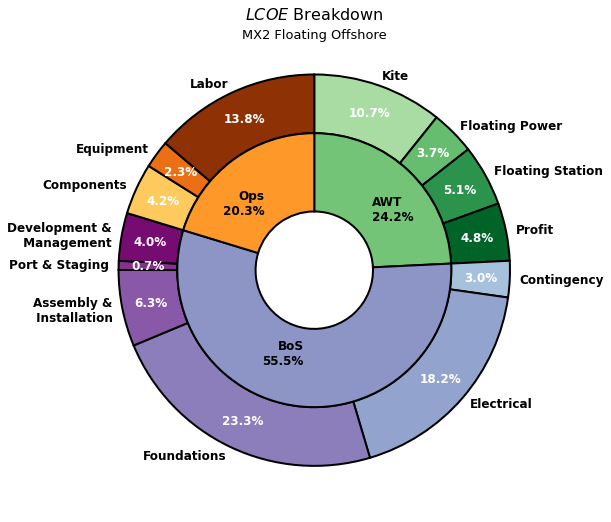

In [ ]:
# Outer order is set here
pie_cats = {'AWT': ['Kite','Floating Power','Floating Station','Profit'],
            'Ops': ['Components','Equipment','Labor'],
            'BoS': ['Contingency','Electrical','Foundations',
                    'Assembly &\n Installation','Port & Staging',
                    'Development &\n Management']}

# Inner order is set here
inner_pie_order = ['AWT', 'BoS', 'Ops']
outer_pie_order = [kk for l in [pie_cats[k] for k in inner_pie_order] for kk in l]

# Data goes here
lcoe_data = {
    'Contingency':	0.0300186611127408,
    'Electrical':	0.181738234634111,
    'Foundations':	0.233066679590495,
    'Assembly &\n Installation':	0.0630258080409591,
    'Port & Staging':	0.00746358253118091,
    'Development &\n Management':	0.0395265086561526,
    'Kite':	0.107479756234686,
    'Floating Power':	0.0365643386231507,
    'Floating Station':	0.050648939757097,
    'Profit':	0.0476188898438993,
    'Components':	0.0422781105758178,
    'Equipment':	0.0229819018745415,
    'Labor':	0.137588588525168,}

inner_pie_sums = {}
for k_o, k_is in pie_cats.items():
  inner_pie_sums[k_o] = sum([lcoe_data[k] for k in k_is])

# Adjust color classes here
outer_pie_colormaps = {'AWT': cm.Greens,
                       'Ops': cm.YlOrBr,
                       'BoS': cm.BuPu}
outer_pie_colors = []
for k in outer_pie_order:
  kk = [kk for kk in pie_cats.keys() if k in pie_cats[kk]][0]

  outer_pie_colors.append(outer_pie_colormaps[kk](
      trim_norm(norm_idx(pie_cats[kk].index(k),len(pie_cats[kk])), 0.35, 0.9)))
    
pie_colors_inner = [outer_pie_colormaps[k](0.5) for k in inner_pie_order]

w_props = {'linewidth': 2,
           'ec': 'k',
           'width': 0.3}
t_props = {'fontsize': 12,
           'weight': 'bold',
           'color': 'white'}

plt.figure(figsize=(9,9))
plt.title('$LCOE$ Breakdown', size=16)
plt.text(0, 1.2,'MX2 Floating Offshore', size=13,
         horizontalalignment='center', verticalalignment='center')
wedges, texts, autotexts = plt.pie(
    [lcoe_data[k] for k in outer_pie_order],
    labels=outer_pie_order, colors=outer_pie_colors, startangle=90.,
    counterclock=False, autopct='%0.1f%%', wedgeprops=w_props,
    pctdistance=0.85, textprops=t_props, labeldistance=1.05)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  # t.set_weight('bold')

w_props_inner = {'linewidth': 2,
           'ec': 'k',
           'width': 0.4,
           'radius':0.7}
wedges, texts = plt.pie(
    [inner_pie_sums[k] for k in inner_pie_order],
    labels=[l + '\n%0.1f%%'%(inner_pie_sums[l]*100.) for l in inner_pie_order], colors=pie_colors_inner, startangle=90.,
    counterclock=False, wedgeprops=w_props_inner, radius=0.7,
    textprops=t_props, labeldistance=0.61)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  t.set_weight('bold')